 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



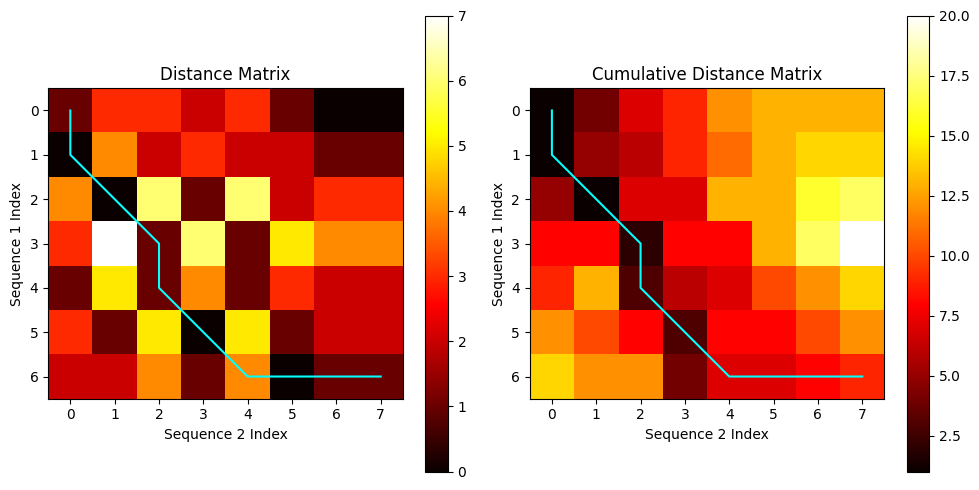

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    Distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            Distance_matrix[i,j] = abs(sequence1[i] - sequence2[j]) 
    Parent_matrix = np.zeros((len(sequence1), len(sequence2)))

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =  np.zeros((len(sequence1), len(sequence2)))  #Cummulative distance matrix
    DTW_cumulate_Matrix[0,0] = Distance_matrix[0,0]
    for j in range(1,len(sequence2)):
        DTW_cumulate_Matrix[0,j] = DTW_cumulate_Matrix[0,j-1] + Distance_matrix[0,j]
        Parent_matrix[0,j] = 2
    
    for j in range(1,len(sequence1)):
        DTW_cumulate_Matrix[j,0] =DTW_cumulate_Matrix[j-1,0] + Distance_matrix[j,0]
        Parent_matrix[j,0] = 1 
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,len(sequence1)): #you can start from 1
        for j in range(1,len(sequence2)):
            
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            DTW_cumulate_Matrix[i, j] = Distance_matrix[i,j] + min([DTW_cumulate_Matrix[i - 1, j], DTW_cumulate_Matrix[i - 1, j - 1], DTW_cumulate_Matrix[i, j - 1]])

            Parent_matrix[i,j] = np.argmin([DTW_cumulate_Matrix[i - 1, j], DTW_cumulate_Matrix[i - 1, j - 1], DTW_cumulate_Matrix[i, j - 1]])

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    i = len(sequence1) - 1 # length of the sequence1
    j =  len(sequence2) - 1# length of the sequence2
    opt_distance = DTW_cumulate_Matrix[i,j]
    
    path = [(i, j)]
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_index = np.argmin([DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]])

        if min_index == 0:
            i-=1
        elif min_index == 1:
            i-=1
            j-=1
        else:
            j-=1
        
        path.append((i,j)) #Store the required indexes to obtain the optimal path
    
    path.append((0, 0))
    path.reverse()

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance,path, DTW_cumulate_Matrix



def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
     
    #Compute distance and cumulative distance between the given templates
    dist_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            dist_matrix[i, j] = abs(sequence1[i] - sequence2[j])

    #Obtain the optimal path using "DTW" function
    opt_distance, dtw_path, DTW_cumulate_Matrix = DTW(sequence1, sequence2)


    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(dist_matrix, cmap='hot', interpolation='nearest')
    plt.title('Distance Matrix')
    plt.colorbar()
    plt.plot([x[1] for x in dtw_path], [x[0] for x in dtw_path], color='cyan')
    plt.xlabel('Sequence 2 Index')
    plt.ylabel('Sequence 1 Index')

    plt.subplot(1, 2, 2)
    plt.imshow(DTW_cumulate_Matrix, cmap='hot', interpolation='nearest')
    plt.title('Cumulative Distance Matrix')
    plt.colorbar()
    plt.plot([x[1] for x in dtw_path], [x[0] for x in dtw_path], color='cyan')
    plt.xlabel('Sequence 2 Index')
    plt.ylabel('Sequence 1 Index')

    plt.tight_layout()
    plt.show()

sequence1 = [4, 3, 7, 0, 2, 6, 5]
sequence2 = [3, 7, 1, 6, 1, 5, 4, 4]
plotDTWpath(sequence1, sequence2)

<b> Report your observations </b>

1. From the graphs we can see that we obtain the path with least cumulative distance.Darker colors indicate lower distances, suggesting closer similarity between elements.

2. The left heatmap shows the pairwise distances between elements of sequences A and B.The right heatmap illustrates the cumulative distances as the DTW algorithm progresses.

3. The blue line represents the optimal path that minimizes the total distance.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

**Algorithm to perform isolated digit recognition**

In [2]:
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy

def load_data(file):
    (rate,sig) = wav.read(file)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    return mfcc_feat_cmvn

In [3]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(sequence1,sequence2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################
    m = sequence1.shape[0]
    n = sequence2.shape[0]

    Distance_matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            Distance_matrix[i,j] = np.mean(abs(sequence1[i] - sequence2[j])) 

    Parent_matrix = np.zeros((m, n))


    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((m,n))   # cummulative distance matrix
    DTW_cumulate_Matrix[0,0] = Distance_matrix[0,0]

    for j in range(1,n):
        DTW_cumulate_Matrix[0,j] = DTW_cumulate_Matrix[0,j-1] + Distance_matrix[0,j]
        Parent_matrix[0, j] = 2
    
    for j in range(1,m):
        DTW_cumulate_Matrix[j,0] =DTW_cumulate_Matrix[j-1,0] + Distance_matrix[j,0]
        Parent_matrix[j, 0] = 1 

    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,m): #you can start from 1
        for j in range(1,n):
               #Compute the distance between the two points
            
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            DTW_cumulate_Matrix[i, j] = Distance_matrix[i,j] + min([DTW_cumulate_Matrix[i - 1, j], DTW_cumulate_Matrix[i - 1, j - 1], DTW_cumulate_Matrix[i, j - 1]])

            Parent_matrix[i,j] = np.argmin([DTW_cumulate_Matrix[i - 1, j], DTW_cumulate_Matrix[i - 1, j - 1], DTW_cumulate_Matrix[i, j - 1]])


    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    i = m - 1 # length of the sequence1
    j =  n - 1# length of the sequence2
    opt_distance = DTW_cumulate_Matrix[i,j]
    path = [(i, j)]
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_index = np.argmin([DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]])

        if min_index == 0:
            i-=1
        elif min_index == 1:
            i-=1
            j-=1
        else:
            j-=1
        
        path.append((i,j)) #Store the required indexes to obtain the optimal path
    
    path.append((0, 0))
    path.reverse()


    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance,path, DTW_cumulate_Matrix




def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    m = sequence1.shape[0]
    n = sequence2.shape[1]
    #Compute distance and cumulative distance between the given templates
    dist_matrix = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            dist_matrix[i, j] = np.mean(abs(sequence1[i] - sequence2[j]))


    #Obtain the optimal path using "DTW" function
    opt_distance, dtw_path, DTW_cumulate_Matrix = vectorDTW(sequence1, sequence2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    #plt.imshow(dist_matrix, cmap='hot', interpolation='nearest')
    plt.title('Distance Matrix')
    #plt.colorbar()
    plt.plot([x[1] for x in dtw_path], [x[0] for x in dtw_path], color='cyan')
    plt.xlabel('Sequence 2 Index')
    plt.ylabel('Sequence 1 Index')

    plt.subplot(1, 2, 2)
    #plt.imshow(DTW_cumulate_Matrix, cmap='hot', interpolation='nearest')
    plt.title('Cumulative Distance Matrix')
    #plt.colorbar()
    plt.plot([x[1] for x in dtw_path], [x[0] for x in dtw_path], color='cyan')
    plt.xlabel('Sequence 2 Index')
    plt.ylabel('Sequence 1 Index')

    plt.tight_layout()
    plt.show()



**Plot the optimal DTW path**

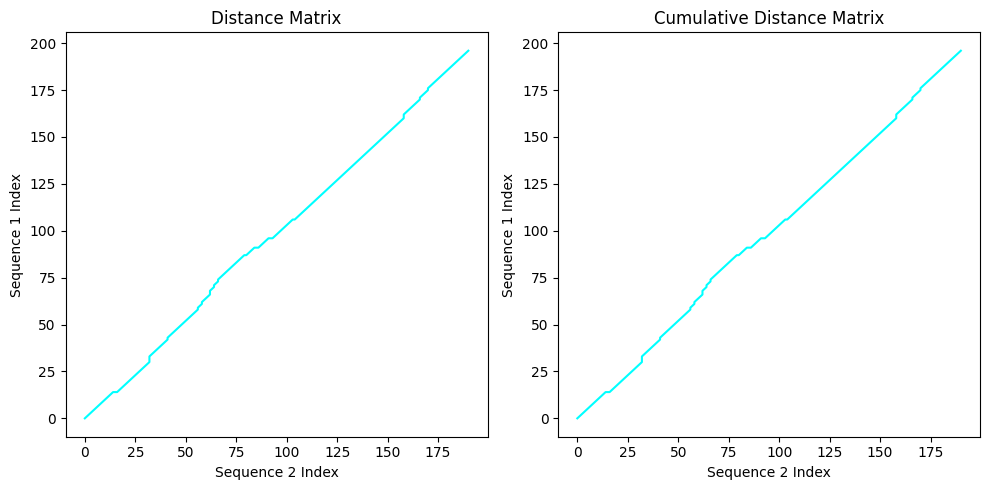

In [4]:

sequence1 = load_data('recording4_4.wav')
sequence2 = load_data('recording4_1.wav')

plotDTWpath(sequence1,sequence2)

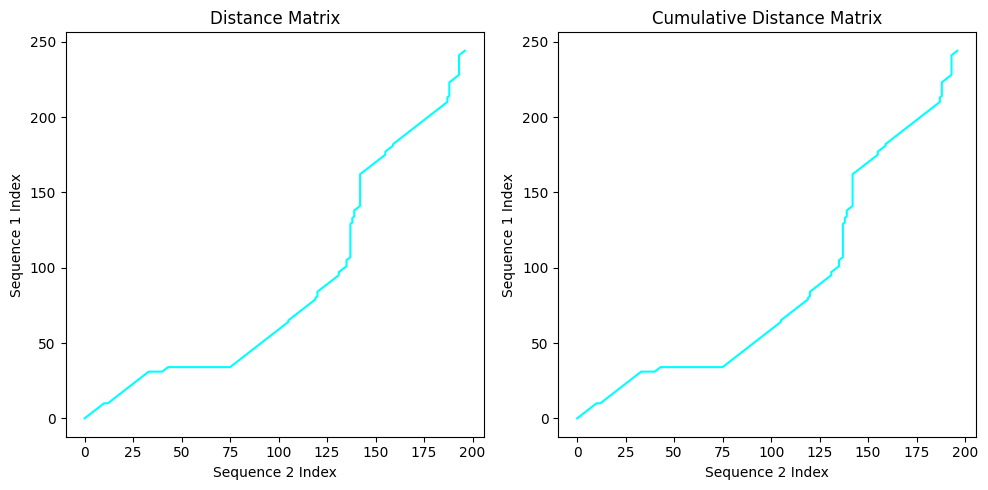

In [5]:
sequence1 = load_data('recording0_1.wav')
sequence2 = load_data('recording8_4.wav')
plotDTWpath(sequence1,sequence2)

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [6]:
train = []
for i in range(10):
    train.append(load_data(f'recording{i}_1.wav'))

confusion_matrix = np.eye(10)
for i in range(10):
    for j in range(2,5):
        dist = []
        sequence = load_data(f'recording{i}_{j}.wav')
        for k in range(10):
            opt_distance,_,_ = vectorDTW(train[k],sequence)
            dist.append(opt_distance)
        idx = np.argmin(dist)
        confusion_matrix[idx][i] += 1

acc = 100 * np.sum(np.diag(confusion_matrix))/30
print(f'Accuracy = {acc:.4f}\n')
print("confusion matrix:")
print(confusion_matrix)


Accuracy = 70.0000

confusion matrix:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [2. 1. 4. 2. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 0. 1. 3. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 2.]]


<b> Report your observations </b>

1. The turquoise line indicates the optimal path that minimizes the total distance, suggesting the best match between the two sequences of MFCCs.

2. Optimal DTW path with different digits is almost deviating from the diagonal, showing that the optimal path is longer than the optimal path of same digits with repettion.

3. Accuracy = 70 %




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [7]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

#Performance evaluation of Isolated digit recognition system on TDIGITS data
users = ['jackson','nicolas','theo','yweweler']

train_jackson =[]
train_nicolas =[]
train_theo =[]
train_yweweler =[]


for user in users:
    if user == 'jackson':
        for i in range(10):
            train_jackson.append(load_data(f'{user}/{i}_{user}_0.wav'))

    if user == 'nicolas':
        for i in range(10):
            train_nicolas.append(load_data(f'{user}/{i}_{user}_0.wav'))

    if user == 'theo':
        for i in range(10):
            train_theo.append(load_data(f'{user}/{i}_{user}_0.wav'))

    if user == 'yweweler':
        for i in range(10):
            train_yweweler.append(load_data(f'{user}/{i}_{user}_0.wav'))

conufusion_jackson = np.eye(10)
conufusion_nicolas = np.eye(10)
conufusion_theo = np.eye(10)
conufusion_yweweler = np.eye(10)

#performance evaluation for each speaker
for user in users:
    if user =='jackson':
        for i in range(10):
            for j in range(1,5):
                dist = []
                sequence_jackson = load_data(f'recording{i}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_jackson[k],sequence_jackson)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_jackson[idx][i] += 1
        acc = 100 * np.sum(np.diag(conufusion_jackson))/490
        print("confusion matrix for Jackson:")
        print(conufusion_jackson) 
        print(f'Accuracy = {acc:.4f}\n')

    if user =='nicolas':
        for i in range(10):
            for j in range(1,5):
                dist = []
                sequence_nicolas = load_data(f'recording{i}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_nicolas[k],sequence_nicolas)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_nicolas[idx,i] += 1
        acc = 100 * np.sum(np.diag(conufusion_nicolas))/490
        print("confusion matrix for nicolas:")
        print(conufusion_nicolas)
        print(f'Accuracy = {acc:.4f}\n')  
    
    if user =='theo':
        for i in range(10):
            for j in range(1,5):
                dist = []
                sequence_theo = load_data(f'recording{i}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_theo[k],sequence_theo)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_theo[idx, i] += 1
        acc = 100 * np.sum(np.diag(conufusion_theo))/490
        print("confusion matrix for theo:")
        print(conufusion_theo)
        print(f'Accuracy = {acc:.4f}\n')
    
    if user =='yweweler':
        for i in range(10):
            for j in range(1,5):
                dist = []
                sequence_yweweler = load_data(f'recording{i}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_yweweler[k],sequence_yweweler)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_yweweler[idx,i] += 1
        acc = 100 * np.sum(np.diag(conufusion_yweweler))/490
        print("\nconfusion matrix for yweweler:")
        print(conufusion_yweweler) 
        print(f'Accuracy = {acc:.4f}\n')       



confusion matrix for Jackson:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 3. 1. 0. 3. 0. 4. 2.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 1. 2. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 2. 2. 1. 1. 1. 2.]
 [0. 0. 0. 2. 0. 1. 0. 0. 0. 1.]]
Accuracy = 3.2653

confusion matrix for nicolas:
[[2. 2. 4. 1. 3. 2. 2. 0. 1. 4.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 2. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [2. 1. 0. 1. 1. 1. 0. 4. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]
Accuracy = 2.8571

confusion matrix for theo:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 1. 0. 0. 0. 0.]
 [2. 1. 4. 3. 1

In [8]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker


users = ['jackson','nicolas','theo','yweweler']
train_jackson =[]
train_nicolas =[]
train_theo =[]
train_yweweler =[]

for user in users:
    if user == 'jackson':
        for i in range(10):
            train_jackson.append(load_data(f'{user}/{i}_{user}_0.wav'))

    if user == 'nicolas':
        for i in range(10):
            train_nicolas.append(load_data(f'{user}/{i}_{user}_0.wav'))

    if user == 'theo':
        for i in range(10):
            train_theo.append(load_data(f'{user}/{i}_{user}_0.wav'))

    if user == 'yweweler':
        for i in range(10):
            train_yweweler.append(load_data(f'{user}/{i}_{user}_0.wav'))

conufusion_jackson = np.eye(10)
conufusion_nicolas = np.eye(10)
conufusion_theo = np.eye(10)
conufusion_yweweler = np.eye(10)

for user in users:
    if user =='jackson':
        for i in range(10):
            for j in range(1,50):
                dist = []
                sequence_jackson = load_data(f'{user}/{i}_{user}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_jackson[k],sequence_jackson)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_jackson[idx][i] += 1
        acc = 100 * np.sum(np.diag(conufusion_jackson))/490
        print("confusion matrix for Jackson:")
        print(conufusion_jackson) 
        print(f'Accuracy = {acc:.4f}\n')

    if user =='nicolas':
        for i in range(10):
            for j in range(1,50):
                dist = []
                sequence_nicolas = load_data(f'{user}/{i}_{user}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_nicolas[k],sequence_nicolas)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_nicolas[idx,i] += 1
        acc = 100 * np.sum(np.diag(conufusion_nicolas))/490
        print("confusion matrix for nicolas:")
        print(conufusion_nicolas)
        print(f'Accuracy = {acc:.4f}\n')  
    
    if user =='theo':
        for i in range(10):
            for j in range(1,50):
                dist = []
                sequence_theo = load_data(f'{user}/{i}_{user}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_theo[k],sequence_theo)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_theo[idx, i] += 1
        acc = 100 * np.sum(np.diag(conufusion_theo))/490
        print("confusion matrix for theo:")
        print(conufusion_theo)
        print(f'Accuracy = {acc:.4f}\n')
    
    if user =='yweweler':
        for i in range(10):
            for j in range(1,50):
                dist = []
                sequence_yweweler = load_data(f'{user}/{i}_{user}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_yweweler[k],sequence_yweweler)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_yweweler[idx,i] += 1
        acc = 100 * np.sum(np.diag(conufusion_yweweler))/490
        print("\nconfusion matrix for yweweler:")
        print(conufusion_yweweler) 
        print(f'Accuracy = {acc:.4f}\n')       



#Suggest some of the changes to improve the system performance

confusion matrix for Jackson:
[[50.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 42.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0. 49.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 42.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. 48.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  5.  0. 50.  5.  8.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  7.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0. 16. 40.  0.  0.]
 [ 0.  6.  1.  0.  2.  0. 21.  2. 50.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0. 46.]]
Accuracy = 86.5306

confusion matrix for nicolas:
[[38.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 34.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 29.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  3. 17.  0.  0.  0.  0.  0.  2.]
 [ 9. 16.  9.  0. 49.  0.  0.  5.  0.  0.]
 [ 0.  0.  0.  0.  0. 50.  0.  0.  0.  8.]
 [ 1.  0.  5. 15.  0.  0. 41.  2.  2.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. 39.  0.  0.]
 [ 0.  0.  4. 17.  1.  0.  8.  4. 48.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 39.]]
Accuracy = 78.3673

confusion matrix for theo:
[[49.  0.  

In [9]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
users = ['nicolas','theo','yweweler']

conufusion_nicolas = np.eye(10)
conufusion_theo = np.eye(10)
conufusion_yweweler = np.eye(10)

for user in users:
    if user =='nicolas':
        for i in range(10):
            for j in range(1,50):
                dist = []
                sequence = load_data(f'{user}/{i}_{user}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_jackson[k],sequence)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_nicolas[idx][i] += 1
        acc = 100 * np.sum(np.diag(conufusion_nicolas))/490
        print("confusion matrix for nicolas:")
        print(conufusion_nicolas)
        print(f'Accuracy = {acc:.4f}\n')

    if user =='theo':
        for i in range(10):
            for j in range(1,50):
                dist = []
                sequence = load_data(f'{user}/{i}_{user}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_jackson[k],sequence)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_theo[idx][i] += 1
        acc = 100 * np.sum(np.diag(conufusion_theo))/490
        print("confusion matrix for theo:")
        print(conufusion_theo)
        print(f'Accuracy = {acc:.4f}\n')
    
    if user =='yweweler':
        for i in range(10):
            for j in range(1,50):
                dist = []
                sequence = load_data(f'{user}/{i}_{user}_{j}.wav')
                for k in range(10):
                    opt_distance,_,_ =   vectorDTW(train_jackson[k],sequence)
                    dist.append(opt_distance)
                idx = np.argmin(dist)
                conufusion_yweweler[idx][i] += 1
        acc = 100 * np.sum(np.diag(conufusion_yweweler))/490
        print("confusion matrix for yweweler:")
        print(conufusion_yweweler)
        print(f'Accuracy = {acc:.4f}\n')
     

confusion matrix for nicolas:
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [17.  0.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. 23.  0.  4.  1. 50.  2.  6.  0. 41.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  1.  3.  0.  0.  0.  1.  0.  4.]
 [31. 26. 48. 42. 48.  0. 47. 43. 50.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Accuracy = 22.0408

confusion matrix for theo:
[[ 7.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 8.  0. 12.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 26.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  6.  0.  0.  0.  0.  0.]
 [ 0. 16.  0.  6.  0. 49.  4. 23.  1. 18.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  2.  0.  0.  0. 16.  0. 22.]
 [34. 32. 38. 16. 44.  1. 45. 10. 49.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]
Accuracy = 35.1020

confusion matrix for yweweler:
[[ 2.  0. 

#Suggest some of the changes to improve the system performance.

1. Speaker Adaptation: Make the system understand different accents and speaking styles better by adjusting to each speaker individually.

2. Noise Reduction: Get rid of unwanted sounds in recordings to make it easier for the system to understand speech.

3. Data Augmentation: Create more varied training data by changing things like pitch and speed, which helps the system handle different speaking styles.

<b> Report your observations </b>

1. DTW works well when we test for the same voice on which we trained the model.


2. If we use another voice for testing, then the model performs poorly.

3. From the calculated accuracies, we can see that for every speaker, we get different accuracy for the model. This means that the accuracy also depends upon how clear you are while speaking the words.

